In [1]:
# Import Dependences 
import numpy as np 
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression, ElasticNet,Lasso, BayesianRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from collections import defaultdict
seed = 1
np.random.seed(seed)

In [2]:
# Import Pokemon CSV data
pokemon = pd.read_csv("pokemon.csv")
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [3]:
# Import Pokemon Combats CSV data
combat = pd.read_csv("combats.csv")
combat.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [4]:
#Here First Column name is #. 
pokemon = pokemon.rename(columns = {'#':"Pokemon Number"})
pokemon.head(5)

,Pokemon Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [5]:
#Total Number Match of each pockemon
FirstCombat = combat.First_pokemon.value_counts().reset_index(name = 'FirstCombat')
SecondCombat = combat.Second_pokemon.value_counts().reset_index(name = 'SecondCombat')
TotalCombat = pd.merge(FirstCombat, SecondCombat, how = 'left', on = 'index')
TotalCombat['Total Match'] = TotalCombat['FirstCombat']+TotalCombat['SecondCombat']

TotalCombat.sort_values('index').head()

,index,FirstCombat,SecondCombat,Total Match
181,1,70,63,133
686,2,55,66,121
238,3,68,64,132
442,4,62,63,125
755,5,50,62,112


In [6]:
# What are the Dimenstions of the Pokemon and Combat Data Series
print("Dimenstions of Pokemon: " + str(pokemon.shape))
print("Dimenstions of Combat: " + str(combat.shape))

Dimenstions of Pokemon: (800, 12)
Dimenstions of Combat: (50000, 3)


In [7]:
#Match winning details
FirstWin = combat['First_pokemon'][combat['First_pokemon'] == combat['Winner']].value_counts().reset_index(name = 'FirstWin')
SecondWin = combat['Second_pokemon'][combat['Second_pokemon'] == combat['Winner']].value_counts().reset_index(name = 'SecondWin')
TotalWin = pd.merge(FirstWin, SecondWin, how  = 'left', on = 'index')
TotalWin['TotalWin'] = TotalWin['FirstWin']+ TotalWin['SecondWin']
TotalWin.head(5)

,index,FirstWin,SecondWin,TotalWin
0,163,81,71,152
1,133,71,53,124
2,164,71,54,125
3,513,70,46,116
4,20,69,46,115


In [8]:
# Identify Any Null fields for Pokemon Data
pokemon.isnull().sum()

Pokemon Number      0
Name                1
Type 1              0
Type 2            386
HP                  0
Attack              0
Defense             0
Sp. Atk             0
Sp. Def             0
Speed               0
Generation          0
Legendary           0
dtype: int64

In [9]:
# Identify Any Null fields for Combat Data
combat.isnull().sum()

First_pokemon     0
Second_pokemon    0
Winner            0
dtype: int64

In [10]:
#Here we have 3 data frame. Let's combine all
result = pd.merge(pokemon, TotalCombat, how = 'left', left_on= 'Pokemon Number', right_on = 'index')
result = pd.merge(result, TotalWin, how = 'left', on = 'index')
result = result.drop(['index'], axis = 1)
result.head(10)

,Pokemon Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,FirstCombat,SecondCombat,Total Match,FirstWin,SecondWin,TotalWin
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,70.0,63.0,133.0,12.0,25.0,37.0
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,55.0,66.0,121.0,20.0,26.0,46.0
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,68.0,64.0,132.0,43.0,46.0,89.0
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,62.0,63.0,125.0,36.0,34.0,70.0
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,50.0,62.0,112.0,24.0,31.0,55.0
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False,66.0,52.0,118.0,35.0,29.0,64.0
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,1,False,60.0,73.0,133.0,50.0,65.0,115.0
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False,65.0,74.0,139.0,56.0,63.0,119.0
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False,66.0,69.0,135.0,56.0,58.0,114.0
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,1,False,58.0,59.0,117.0,10.0,9.0,19.0


In [11]:
Total_Win = result.groupby("Name").agg({"TotalWin": "sum"}).sort_values(by = "TotalWin",ascending=False)
Total_Win.head(10)

,TotalWin
Name,
Mewtwo,152.0
Infernape,136.0
Aerodactyl,136.0
Jirachi,134.0
Deoxys Speed Forme,133.0
Slaking,133.0
Mega Absol,130.0
Murkrow,130.0
Mega Houndoom,128.0


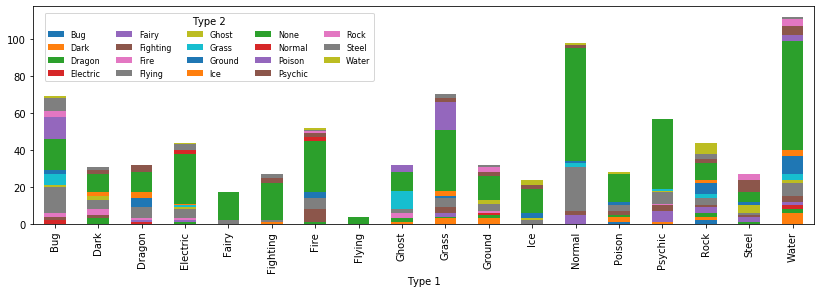

In [12]:
pokemon["Type 2"] = pokemon["Type 2"].fillna("None")
type_cross = pd.crosstab(pokemon["Type 1"], pokemon["Type 2"])
type_cross.plot.bar(stacked=True, figsize=(14,4))
plt.legend(bbox_to_anchor=(0.01, 0.99), loc='upper left', ncol=5, fontsize=8, title="Type 2")
plt.show()

Text(0.5, 1.0, 'Total Pokemon by Type 1')

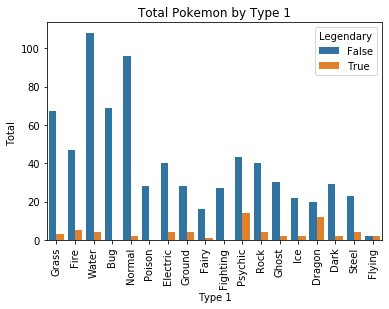

In [13]:
ax = sns.countplot(x="Type 1", hue="Legendary", data=pokemon)
plt.xticks(rotation= 90)
plt.xlabel('Type 1')
plt.ylabel('Total ')
plt.title("Total Pokemon by Type 1")

Text(0.5, 1.0, 'Total Pokemon by Type 2')

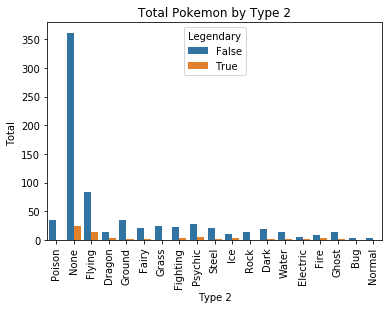

In [14]:
ax = sns.countplot(x="Type 2", hue="Legendary", data=pokemon)
plt.xticks(rotation= 90)
plt.xlabel('Type 2')
plt.ylabel('Total ')
plt.title("Total Pokemon by Type 2")

In [15]:
# How many unique Type 1 Pokemon are there in the dataset
print ("There are {} Types.".format(len(pokemon["Type 1"].drop_duplicates())))
list(pokemon["Type 1"].drop_duplicates())

There are 18 Types.


['Grass',
 'Fire',
 'Water',
 'Bug',
 'Normal',
 'Poison',
 'Electric',
 'Ground',
 'Fairy',
 'Fighting',
 'Psychic',
 'Rock',
 'Ghost',
 'Ice',
 'Dragon',
 'Dark',
 'Steel',
 'Flying']

In [39]:
# How many Type 1 pokemon are in the dataset
print(pokemon['Type 1'].value_counts(dropna =False))
print('-----------------------------------------------')
print ("There are {} Types.".format(len(pokemon["Type 1"].drop_duplicates())))

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64
-----------------------------------------------
There are 18 Types.


In [17]:
# How many unique Type 1 and Type 2 combinations in the dataset
type_cols = ["Type 1", "Type 2"]
print ("There are {} unique type-combinations.".format(len(pokemon[type_cols].drop_duplicates())))

There are 154 unique type-combinations.


In [18]:
corr_data = result.drop(columns=['Pokemon Number','Name','FirstCombat','SecondCombat','Total Match','FirstWin','SecondWin','Generation','Legendary'])

In [19]:
corr_data

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,TotalWin
0,Grass,Poison,45,49,49,65,65,45,37.0
1,Grass,Poison,60,62,63,80,80,60,46.0
2,Grass,Poison,80,82,83,100,100,80,89.0
3,Grass,Poison,80,100,123,122,120,80,70.0
4,Fire,NaN,39,52,43,60,50,65,55.0
...,...,...,...,...,...,...,...,...,...
795,Rock,Fairy,50,100,150,100,150,50,39.0
796,Rock,Fairy,50,160,110,160,110,110,116.0
797,Psychic,Ghost,80,110,60,150,130,70,60.0
798,Psychic,Dark,80,160,60,170,130,80,89.0


In [20]:
corr_data.corr()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,TotalWin
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.260992
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.494193
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.135197
Sp. Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.469786
Sp. Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.325026
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,0.917472
TotalWin,0.260992,0.494193,0.135197,0.469786,0.325026,0.917472,1.000000


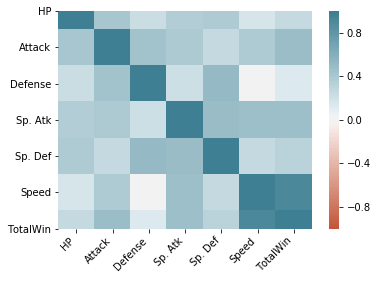

In [21]:
corr = corr_data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Text(0.5, 1.0, 'Attack Vs Total Win')

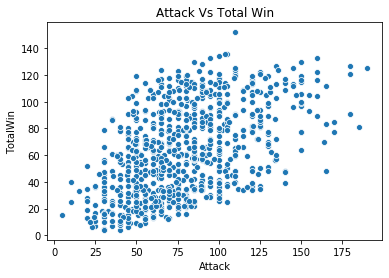

In [22]:
sns.scatterplot(x="Attack", y="TotalWin", 
            data=result).set_title("Attack Vs Total Win")

Text(0.5, 1.0, 'Defense Vs Total Win')

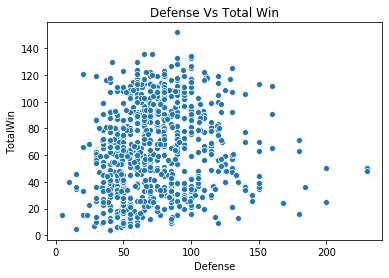

In [23]:
sns.scatterplot(x="Defense", y="TotalWin", 
            data=result).set_title("Defense Vs Total Win")

Text(0.5, 1.0, 'Speed Vs Total Win')

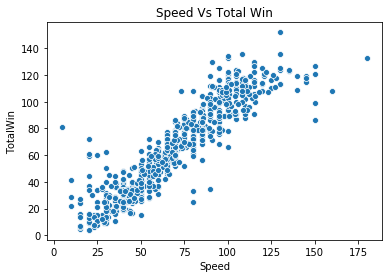

In [24]:
sns.scatterplot(x="Speed", y="TotalWin", 
            data=result).set_title("Speed Vs Total Win")

In [25]:
# drop na values from dataframe
result = result.dropna()
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405 entries, 0 to 799
Data columns (total 18 columns):
Pokemon Number    405 non-null int64
Name              405 non-null object
Type 1            405 non-null object
Type 2            405 non-null object
HP                405 non-null int64
Attack            405 non-null int64
Defense           405 non-null int64
Sp. Atk           405 non-null int64
Sp. Def           405 non-null int64
Speed             405 non-null int64
Generation        405 non-null int64
Legendary         405 non-null bool
FirstCombat       405 non-null float64
SecondCombat      405 non-null float64
Total Match       405 non-null float64
FirstWin          405 non-null float64
SecondWin         405 non-null float64
TotalWin          405 non-null float64
dtypes: bool(1), float64(6), int64(8), object(3)
memory usage: 57.3+ KB


In [26]:
result.columns

Index(['Pokemon Number', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'FirstCombat',
       'SecondCombat', 'Total Match', 'FirstWin', 'SecondWin', 'TotalWin'],
      dtype='object')

In [27]:
#Drop Pokemon Number, Name, First_Pokemon, Second_Pokemon and Total Fights
result
Encoding_result = result.drop(['Pokemon Number','Name','FirstCombat','SecondCombat','Total Match',
                               'FirstWin', 'SecondWin'],axis =1)
Encoding_result['Legendary'] = Encoding_result['Legendary'].astype(str)
Encoding_result = pd.get_dummies(Encoding_result, drop_first = True)
Encoding_result.head(5)

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,TotalWin,Type 1_Dark,Type 1_Dragon,...,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water,Legendary_True
0,45,49,49,65,65,45,1,37.0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,60,62,63,80,80,60,1,46.0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,80,82,83,100,100,80,1,89.0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,80,100,123,122,120,80,1,70.0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,78,84,78,109,85,100,1,115.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
#Split Dependent and Target Variable
WinningPercentage = Encoding_result['TotalWin']
Encoding_result.drop(['TotalWin'], axis =1, inplace = True)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(Encoding_result,WinningPercentage, test_size = 0.2, random_state = 10)

In [30]:
acc = {}

In [31]:
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(x_train,y_train)

name = 'Linear Regression'
score = model.score(x_test,y_test)
acc[name] = model.score(x_test,y_test)
acc[name]
print(f"R2 Score: {score}")

R2 Score: 0.8907203761835932


In [32]:
model.coef_
model_coef = pd.DataFrame(zip(model.coef_,x_train.columns))
model_coef

,0,1
0,0.061591,HP
1,0.108148,Attack
2,0.039400,Defense
3,0.008632,Sp. Atk
4,0.012723,Sp. Def
5,0.954175,Speed
6,0.271598,Generation
7,10.028443,Type 1_Dark
8,2.665213,Type 1_Dragon
9,2.058319,Type 1_Electric


In [33]:
reg = BayesianRidge()

name = 'Bayesian Ridge'
reg.fit(x_train,y_train)
score = reg.score(x_test,y_test)
acc[name] = reg.score(x_test,y_test)
acc[name]
print(f"R2 Score: {score}")

R2 Score: 0.9024471549941797


In [34]:
reg.coef_
reg_coef = pd.DataFrame(zip(reg.coef_,x_train.columns))
reg_coef

,0,1
0,0.057093,HP
1,0.104574,Attack
2,0.029676,Defense
3,-0.005529,Sp. Atk
4,0.012238,Sp. Def
5,0.953294,Speed
6,0.194687,Generation
7,0.222491,Type 1_Dark
8,-0.045926,Type 1_Dragon
9,0.007972,Type 1_Electric


In [35]:
las = Lasso()
name = 'Lasso'
las.fit(x_train,y_train)
score = las.score(x_test,y_test)
acc[name] = las.score(x_test,y_test)
acc[name]
print(f"R2 Score: {score}")

R2 Score: 0.9018185810396633


In [36]:
las.coef_
las_coef = pd.DataFrame(zip(las.coef_,x_train.columns))
las_coef

,0,1
0,0.055768,HP
1,0.102785,Attack
2,0.030565,Defense
3,-0.004605,Sp. Atk
4,0.009161,Sp. Def
5,0.956840,Speed
6,0.000000,Generation
7,0.000000,Type 1_Dark
8,-0.000000,Type 1_Dragon
9,0.000000,Type 1_Electric


In [37]:
#Model Summary
acc_df = pd.DataFrame(list(acc.items()), columns=['Linear Model', 'R2 Score'])
acc_df = acc_df.sort_values(by='R2 Score', ascending=False)
acc_df

,Linear Model,R2 Score
1,Bayesian Ridge,0.902447
2,Lasso,0.901819
0,Linear Regression,0.890720
